In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the cleaned data
df = pd.read_csv('weather_data_monthly.csv', index_col='utc_timestamp', parse_dates=True)

# Step 2: Filter the data for the last 10 years
last_10_years = df[df.index >= (df.index.max() - pd.DateOffset(years=10))]

In [8]:
# Step 3: Calculate the average temperature and solar radiation for each country
# We'll create a new DataFrame to store the results
results = pd.DataFrame()

country_codes = set([col.split('_')[0] for col in df.columns if '_' in col])

for country in country_codes:
    temperature_col = f"{country}_temperature"
    radiation_cols = [f"{country}_radiation_direct_horizontal", f"{country}_radiation_diffuse_horizontal"]

    if temperature_col in last_10_years.columns:
        avg_temp = last_10_years[temperature_col].mean()
        avg_radiation = last_10_years[radiation_cols].sum(axis=1).mean()  # Summing direct and diffuse radiation
        fluctuation = last_10_years[temperature_col].std()  # Standard deviation as a measure of fluctuation

        results.loc[country, 'average_temperature'] = avg_temp
        results.loc[country, 'average_radiation'] = avg_radiation
        results.loc[country, 'temperature_fluctuation'] = fluctuation
        
        # Round the results to 2 decimal places
        results.loc[country, 'average_temperature'] = round(avg_temp, 2)
        results.loc[country, 'average_radiation'] = round(avg_radiation, 2)
        results.loc[country, 'temperature_fluctuation'] = round(fluctuation, 2)

In [9]:
# Step 4: Save the final DataFrame to a CSV file
results.to_csv('country_temperature_radiation_fluctuation.csv')

# Optional: Display the first few rows of the results
results.head()

,average_temperature,average_radiation,temperature_fluctuation
SK,8.79,158.47,8.63
PL,8.56,144.77,8.47
LU,9.26,151.12,6.88
FI,4.23,113.14,9.11
CZ,8.51,153.71,8.21


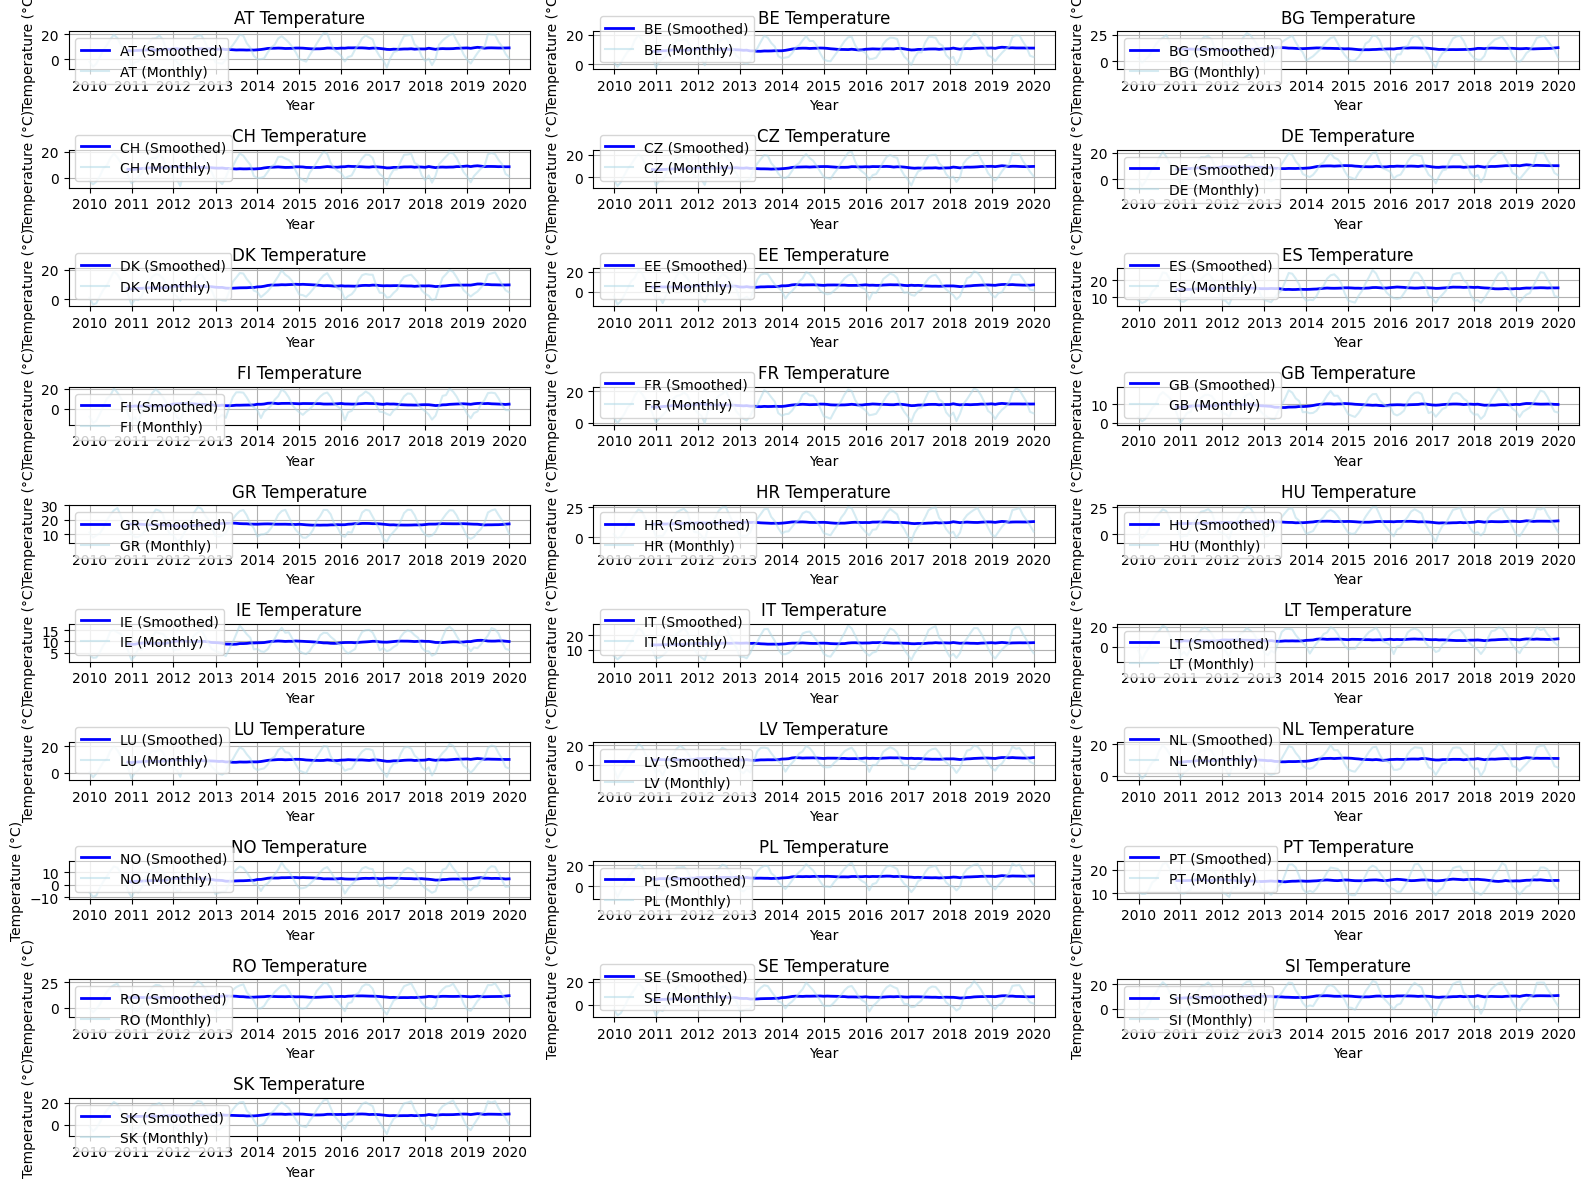

In [11]:
# Step 5: Plot the temperature over time with smoothing and subplots
plt.figure(figsize=(16, 12))

# Number of subplots (2 rows by 3 columns if there are more than 6 countries)
num_countries = len(country_codes)
cols = 3
rows = (num_countries + cols - 1) // cols

for i, country in enumerate(sorted(country_codes)):
    temperature_col = f"{country}_temperature"
    
    if temperature_col in last_10_years.columns:
        plt.subplot(rows, cols, i + 1)
        
        # Smooth the data using a rolling average
        smoothed_temp = last_10_years[temperature_col].rolling(window=12).mean()
        
        plt.plot(last_10_years.index, smoothed_temp, label=f'{country} (Smoothed)', color='blue', linewidth=2)
        plt.plot(last_10_years.index, last_10_years[temperature_col], label=f'{country} (Monthly)', color='lightblue', alpha=0.5)
        
        plt.title(f'{country} Temperature')
        plt.xlabel('Year')
        plt.ylabel('Temperature (°C)')
        plt.legend()
        plt.grid(True)

plt.tight_layout()
plt.show()